In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn import datasets, metrics
import math

In [2]:
training1 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/train_jet0_final.csv')
training2 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/train_jet1_final.csv')
training3 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/train_jet2.3_final.csv')

In [3]:
sub_training1=training1.drop('EventId',1).drop('Label',1).drop('Weight',1)
sub_training2=training2.drop('EventId',1).drop('Label',1).drop('Weight',1)
sub_training3=training3.drop('EventId',1).drop('Label',1).drop('Weight',1)

In [4]:
training_set=[sub_training1,sub_training2,sub_training3]

In [5]:
training1.ix[training1.Label=='s','Label']=0
training1.ix[training1.Label=='b','Label']=1
training2.ix[training2.Label=='s','Label']=0
training2.ix[training2.Label=='b','Label']=1
training3.ix[training3.Label=='s','Label']=0
training3.ix[training3.Label=='b','Label']=1

In [6]:
for i in range(len(training_set)):
    length=len(training_set[i])
    subset_length=length/10
    exec("training_val"+str(i) + " = []")
    for j in range(9):
        temp_set=training_set[i][(subset_length*j):(subset_length*(j+1))]
        exec("training_val"+str(i) + ".append(temp_set)")
    temp_set=training_set[i][(subset_length*9):]
    exec("training_val"+str(i) + ".append(temp_set)")
        

In [7]:
sub_test1=training1['Label']
sub_test2=training2['Label']
sub_test3=training3['Label']
testing_set=[sub_test1,sub_test2,sub_test3]
for i in range(len(testing_set)):
    length=len(testing_set[i])
    subset_length=length/10
    exec("test_val"+str(i) + " = []")
    for j in range(9):
        temp_set=testing_set[i][(subset_length*j):(subset_length*(j+1))]
        exec("test_val"+str(i) + ".append(temp_set)")
    temp_set=testing_set[i][(subset_length*9):]
    exec("test_val"+str(i) + ".append(temp_set)")

In [8]:
sub_weight1=training1['Weight']
sub_weight2=training2['Weight']
sub_weight3=training3['Weight']
weight_set=[sub_weight1,sub_weight2,sub_weight3]
for i in range(len(weight_set)):
    length=len(weight_set[i])
    subset_length=length/10
    exec("weight_val"+str(i) + " = []")
    for j in range(9):
        temp_set=weight_set[i][(subset_length*j):(subset_length*(j+1))]
        exec("weight_val"+str(i) + ".append(temp_set)")
    temp_set=weight_set[i][(subset_length*9):]
    exec("weight_val"+str(i) + ".append(temp_set)")

In [9]:
eval_x=[training_val0,training_val1,training_val2]
eval_y=[test_val0,test_val1,test_val2]
eval_w=[weight_val0,weight_val1,weight_val2]

In [10]:
def AMS(real,pred,weight):
    pred_s_ind=np.array(pred==0)
    real_s_ind=np.array(real==0)
    real_b_ind=np.array(real==1)
    
    s=np.sum(weight[pred_s_ind & real_s_ind])
    b=np.sum(weight[pred_s_ind & real_b_ind])
    
    b_tau=10
    ans=math.sqrt(2*((s+b+b_tau)*math.log(1+s/(b+b_tau))-s))
    return (ans)
    
    

In [20]:
num_of_units=[]
#num_of_units2=[]
for k in range(len(eval_x)):
    set_group=[]
    #set_group2=[]
    for i in range(10,21):
        temp_units=[]
        #temp_units2=[]
        for j in range(10):
            print (k,i,j)
            classifier=tf.contrib.learn.DNNClassifier(hidden_units=[i], n_classes=2)
            validation_x=eval_x[k][j]
            validation_y=eval_y[k][j]
            validation_w=eval_w[k][j]
            train_x=pd.concat(eval_x[k][:j]+eval_x[k][j+1:])
            train_y=pd.concat(eval_y[k][:j]+eval_y[k][j+1:])
            classifier.fit(x=train_x.values, y=np.array(train_y, dtype=np.int), steps=200)
            #temp_units2.append(classifier)
            pred=classifier.predict(validation_x.values)
            accuracy=AMS(validation_y.values,pred,validation_w.values)
            print (accuracy)
            temp_units.append(accuracy)
        set_group.append(temp_units)
        #set_group2.append(temp_units2)
    num_of_units.append(set_group)
    #num_of_units2.append(set_group2)


        
        

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


(0, 10, 0)
0.364038322269

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 1)
0.369682120716

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 2)
0.349806296182

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 3)
0.358246974662

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 4)
0.354027148588

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 5)
0.35570516661

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 6)
0.365042536423

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 7)
0.358074530441

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 8)
0.353032087882

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 10, 9)
0.361848643113

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 0)
0.507838298761

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 1)
0.487557257669

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 2)
0.474570754705

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 3)
0.474378152447

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 4)
0.480168719861

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 5)
0.469489926243

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 6)
0.504227445215

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 7)
0.485783789185

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 8)
0.497803852289

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 11, 9)
0.481886489223

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 0)
0.500600513843

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 1)
0.489239714382

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 2)
0.543909898546

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 3)
0.45979467586

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 4)
0.505099714023

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 5)
0.482588530117

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 6)
0.483332902763

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 7)
0.493051780765

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 8)
0.498160937577

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 12, 9)
0.457139445938

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 0)
0.402281486292

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 1)
0.40155229816

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 2)
0.384297248114

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 3)
0.392291077335

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 4)
0.382839940227

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 5)
0.387633298038

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 6)
0.398335083608

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 7)
0.392311878999

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 8)
0.384218344995

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 13, 9)
0.392477857892

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 0)
0.434811312333

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 1)
0.447421522013

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 2)
0.411002332597

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 3)
0.424908722457

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 4)
0.415566377306

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 5)
0.419971731421

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 6)
0.438124897301

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 7)
0.423714641845

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 8)
0.417302382609

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 14, 9)
0.445693701076

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 0)
0.497409095566

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 1)
0.5321063226

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 2)
0.501084444544

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 3)
0.46177799248

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 4)
0.49892460602

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 5)
0.516054172917

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 6)
0.55375195999

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 7)
0.521739057716

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 8)
0.547318633021

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 15, 9)
0.505083732002

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 0)
0.424121919825

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 1)
0.420615978883

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 2)
0.397901769217

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 3)
0.41086068531

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 4)
0.410755612106

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 5)
0.438678639509

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 6)
0.387623562789

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 7)
0.406731859127

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 8)
0.458783733314

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 16, 9)
0.434905539447

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 0)
0.481667031128

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 1)
0.497070246378

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 2)
0.534545651636

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 3)
0.46717306136

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 4)
0.504952630262

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 5)
0.514766813532

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 6)
0.514039785411

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 7)
0.523630078794

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 8)
0.524618467213

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 17, 9)
0.503917633721

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 0)
0.518510171471

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 1)
0.522595406362

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 2)
0.540513074416

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 3)
0.500828322716

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 4)
0.511634558058

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 5)
0.523690541017

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 6)
0.567365731746

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 7)
0.531725088661

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 8)
0.564015633514

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 18, 9)
0.528953591047

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 0)
0.387101081588

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 1)
0.385299420469

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 2)
0.366008183689

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 3)
0.371083171328

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 4)
0.365270495718

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 5)
0.374821607064

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 6)
0.380884283638

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 7)
0.378772346826

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 8)
0.371834419282

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 19, 9)
0.457238041846

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 0)
0.421456407141

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 1)
0.425325072919

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 2)
0.399286575252

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 3)
0.402382868166

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 4)
0.426038720611

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 5)
0.407688475857

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 6)
0.453589429662

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 7)
0.397262295643

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 8)
0.40005095235

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(0, 20, 9)
0.415606370006

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 0)
0.252660342847

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 1)
0.246746379676

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 2)
0.247624467496

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 3)
0.246908500404

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 4)
0.15553490616

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 5)
0.249737245552

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 6)
0.245001850707

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 7)
0.160499380899

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 8)
0.243275140558

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 10, 9)
0.246119219897

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 0)
0.208231106542

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 1)
0.214562341022

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 2)
0.175893867108

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 3)
0.19089381044

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 4)
0.18558803554

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 5)
0.192258618129

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 6)
0.195635368961

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 7)
0.182502935754

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 8)
0.179660878845

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 11, 9)
0.200003347265

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 0)
0.270199650016

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 1)
0.258546488916

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 2)
0.259570244727

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 3)
0.26687985843

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 4)
0.27091752979

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 5)
0.266745068074

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 6)
0.270104099271

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 7)
0.268440558941

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 8)
0.257440726855

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 12, 9)
0.259204781724

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 0)
0.187802422491

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 1)
0.194253278554

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 2)
0.167972130203

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 3)
0.187705855717

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 4)
0.185803100428

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 5)
0.180099042688

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 6)
0.178816304159

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 7)
0.180757976616

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 8)
0.1990046377

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 13, 9)
0.177695554704

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 0)
0.160763188398

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 1)
0.153855474137

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 2)
0.158495867194

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 3)
0.162492425763

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 4)
0.154580630319

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 5)
0.141591044439

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 6)
0.13255031448

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 7)
0.153507725785

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 8)
0.160334472387

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 14, 9)
0.168081453304

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 0)
0.205137863961

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 1)
0.187227560664

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 2)
0.173065077188

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 3)
0.194736374833

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 4)
0.193038382916

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 5)
0.184914677578

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 6)
0.168992210184

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 7)
0.181920634832

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 8)
0.194879772579

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 15, 9)
0.178388928301

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 0)
0.179619396149

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 1)
0.205775000571

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 2)
0.147273551961

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 3)
0.176328253973

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 4)
0.164754549341

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 5)
0.169382234897

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 6)
0.144697081695

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 7)
0.162526200165

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 8)
0.169755037376

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 16, 9)
0.180811840548

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 0)
0.281028911495

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 1)
0.276251036466

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 2)
0.279045436052

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 3)
0.27937785931

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 4)
0.282569949046

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 5)
0.241778203192

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 6)
0.224452918793

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.



(1, 17, 7)
Traceback (most recent call last):
  File "//anaconda/envs/dato-env/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
  File "//anaconda/envs/dato-env/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
  File "//anaconda/envs/dato-env/lib/python2.7/site-packages/IPython/core/ultratb.py", line 267, in _fixed_getinnerframes
  File "//anaconda/envs/dato-env/lib/python2.7/inspect.py", line 1049, in getinnerframes
  File "//anaconda/envs/dato-env/lib/python2.7/inspect.py", line 1009, in getframeinfo
  File "//anaconda/envs/dato-env/lib/python2.7/inspect.py", line 454, in getsourcefile
  File "//anaconda/envs/dato-env/lib/python2.7/inspect.py", line 483, in getmodule
  File "//anaconda/envs/dato-env/lib/python2.7/inspect.py", line 467, in getabsfile
  File "//anaconda/envs/dato-env/lib/python2.7/posixpath.py", line 364, in abspath
OSError: [Errno 24] Too many open files


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [17]:
training1.ix[training1.Label=='s','Label']=0
training1.ix[training1.Label=='b','Label']=1

In [38]:
sumarray=(np.concatenate((sumarray,np.array(thirdarray)),axis=0))

In [41]:
np.save('sumarray', sumarray)

In [53]:
mean_array=np.apply_along_axis(lambda x: np.mean(x), 1, sumarray)
mean_array1=mean_array[range(11)]
mean_array2=mean_array[range(11,22)]
mean_array3=mean_array[range(22,33)]

In [56]:
units_for_1=np.argmax(mean_array1)+10
units_for_2=np.argmax(mean_array2)+10
units_for_3=np.argmax(mean_array3)+10

In [69]:
best_units=[units_for_1,units_for_2,units_for_3]

In [192]:
test1 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/test_jet_0')
test2 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/test_jet_1')
test3 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/test_jet_2_3')

train1 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/train_jet_0')
train2 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/train_jet_1')
train3 = pd.read_csv('https://raw.githubusercontent.com/EmZhu/HiggsBoson/master/Final_data/train_jet_2_3')

In [197]:
sub_train1=train1.drop('EventId',1).drop('Weight',1).drop('Label',1)
sub_train2=train2.drop('EventId',1).drop('Weight',1).drop('Label',1)
sub_train3=train3.drop('EventId',1).drop('Weight',1).drop('Label',1)

weight1=train1['Weight']
weight2=train2['Weight']
weight3=train3['Weight']

label1=train1['Label']
label2=train2['Label']
label3=train3['Label']

In [198]:
label1.ix[label1=='s']=0
label1.ix[label1=='b']=1
label2.ix[label2=='s']=0
label2.ix[label2=='b']=1
label3.ix[label3=='s']=0
label3.ix[label3=='b']=1

//anaconda/envs/dato-env/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [202]:
label1=np.array(label1,dtype=np.int)
label2=np.array(label2,dtype=np.int)
label3=np.array(label3,dtype=np.int)

In [203]:
weight1=np.array(weight1)
weight2=np.array(weight2)
weight3=np.array(weight3)

sub_train1=np.array(sub_train1)
sub_train2=np.array(sub_train2)
sub_train3=np.array(sub_train3)

In [204]:
label_list=[label1,label2,label3]
weight_list=[weight1,weight2,weight3]
train_list=[sub_train1,sub_train2,sub_train3]

In [205]:
pred_list=[]
for i in range(3):
    classifier = tf.contrib.learn.DNNClassifier(hidden_units=[best_units[i]], n_classes=2)
    classifier.fit(x=train_list[i], y=label_list[i], steps=200)
    pred_list.append(classifier.predict(train_list[i]))
    

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is yo

In [208]:
pred=np.concatenate((pred_list[0],pred_list[1],pred_list[2]),axis=0)

In [209]:
weight=np.concatenate((weight_list[0],weight_list[1],weight_list[2]),axis=0)
real=np.concatenate((label_list[0],label_list[1],label_list[2]),axis=0)


In [212]:
AMS(real,pred,weight)

1.7719920657803743

In [214]:
analysis_array=np.load('sumarray.npy')

In [227]:
subset_group=[1]*110+[2]*110+[3]*110
units_number=[]
for i in range(10,21):
    units_number=units_number+[i]*10
units_number=units_number*3

ams_val=[]
for i in analysis_array:
    for j in i:
        ams_val.append(j)

In [232]:
result_frame=pd.DataFrame({'subset_group':subset_group,'units_number':units_number,'ams_val':ams_val})

In [233]:
result_frame

,ams_val,subset_group,units_number
0,0.364038,1,10
1,0.369682,1,10
2,0.349806,1,10
3,0.358247,1,10
4,0.354027,1,10
5,0.355705,1,10
6,0.365043,1,10
7,0.358075,1,10
8,0.353032,1,10
9,0.361849,1,10


In [238]:
import seaborn as sns
import matplotlib
%matplotlib inline

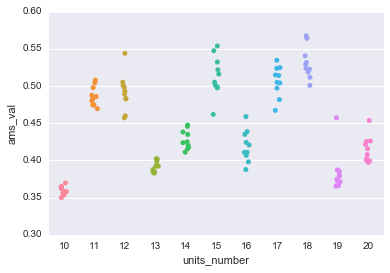

In [239]:
sns.stripplot(x="units_number", y="ams_val", data=result_frame[result_frame['subset_group']==1], jitter=True)

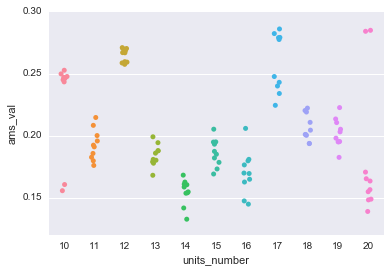

In [240]:
sns.stripplot(x="units_number", y="ams_val", data=result_frame[result_frame['subset_group']==2], jitter=True)

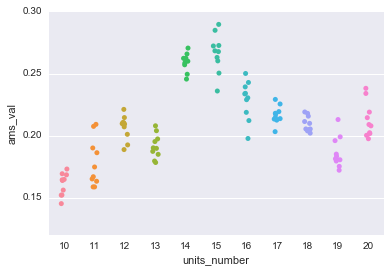

In [241]:
sns.stripplot(x="units_number", y="ams_val", data=result_frame[result_frame['subset_group']==3], jitter=True)

In [248]:
mean_list=[]
for i in analysis_array:
    mean_list.append(np.mean(i))
mean_list

[0.35895038268853835,
 0.48637046855978661,
 0.49129181138150224,
 0.39182385136596887,
 0.42785176209564596,
 0.51352500168550608,
 0.41909792995259593,
 0.50663813994367679,
 0.53098321190089126,
 0.38383130514478669,
 0.41486871676065418,
 0.22941074341953863,
 0.19252303096053033,
 0.26480490067422935,
 0.18399103032594527,
 0.154625259620606,
 0.1862301483034981,
 0.17009231466756183,
 0.25925075009867266,
 0.20652428043500501,
 0.20198247224300436,
 0.18146806951467026,
 0.16083059299999999,
 0.17793937399999998,
 0.20644833600000001,
 0.19137917699999998,
 0.25919187200000005,
 0.26649378000000001,
 0.22875863700000001,
 0.21661330600000001,
 0.20949462300000002,
 0.18644109099999998,
 0.212372423]

In [249]:
group_frame=pd.DataFrame({'subset_group':[1]*11+[2]*11+[3]*11,'units_number':range(10,21)*3,'ams_val':mean_list})

In [250]:
group_frame

,ams_val,subset_group,units_number
0,0.358950,1,10
1,0.486370,1,11
2,0.491292,1,12
3,0.391824,1,13
4,0.427852,1,14
5,0.513525,1,15
6,0.419098,1,16
7,0.506638,1,17
8,0.530983,1,18
9,0.383831,1,19


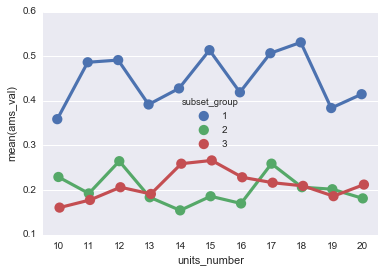

In [251]:
sns.pointplot(x="units_number", y="ams_val", hue="subset_group",data=group_frame, dodge=True)